# Data Cleaning

Estimated time needed: **45** minutes

Most of the real-world data, that the data scientist work with, are raw data, meaning that it can contain repeated, missing, and irrelevant entries of information. Hence, if this data is used in any machine learning analysis, it will result in low accuracy or incorrect prediction. For this reason, data cleaning, also known as data cleansing, is an important technique that comes prior to any model building. 

In this notebook, we will take a look at some of the common data cleaning techniques that data scientists may use to prepare their data for analysis.

## Objectives

After completing this lab you will be able to:

*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers



***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`numpy`](https://numpy.org/) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/) for statistical computations.


## **Import the required libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
!pip install mamba

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import piplite
await piplite.install(['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'scipy'])

In [9]:
import warnings 
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **Reading and understanding our data**


For this lab, we will be using the Ames_Housing_Data.tsv file, hosted on IBM Cloud object storage. The Ames housing dataset examines features of houses sold in Ames (a small city in the state of Iowa in the United States) during the 2006–2010 timeframe.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [ ]:
## Load in the Ames Housing Data
from pyodide.http import pyfetch
 
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
            
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv"
 
await download(path, "Ames_Housing_Data1.tsv")
 
housing = pd.read_csv("data/Ames_Housing_Data1.tsv", sep='\t')
 
housing.head(5)

In [14]:
housing = pd.read_csv("data/Ames_Housing_Data1.tsv", sep='\t')
housing.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


We can find more information about the features and types using the `info()`  method.


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

According to the output above, we have 2930 entries, 0 to 2929, as well as 81 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2930 then there is no missing values for that particular feature. 'SalePrice' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (28 int64 and 11 float64) and object data types. 


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [19]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section. 


## Exercise 1


The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'Sale Condition' attribute.


In [22]:
housing["Sale Condition"].value_counts()

Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

In [23]:
housing["Sale Condition"].value_counts(normalize=True)

Normal     0.823610
Partial    0.083589
Abnorml    0.064824
Family     0.015694
Alloca     0.008188
AdjLand    0.004094
Name: Sale Condition, dtype: float64

## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [24]:
hous_num = housing.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['SalePrice'][:-1] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


Above, there are 11 features, with coefficients greater than 0.5, that are strongly correlated with the sale price. 


Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


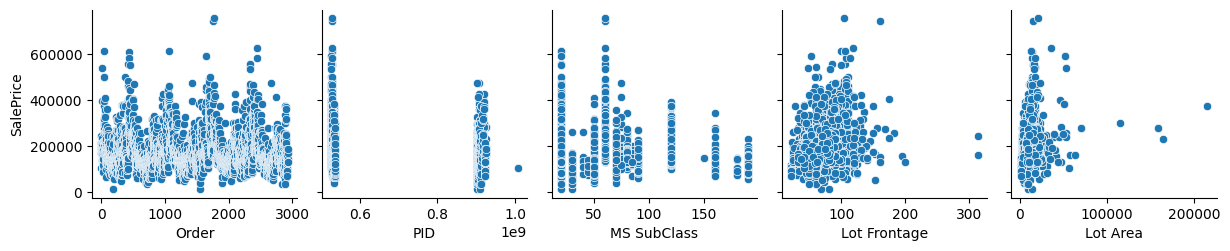

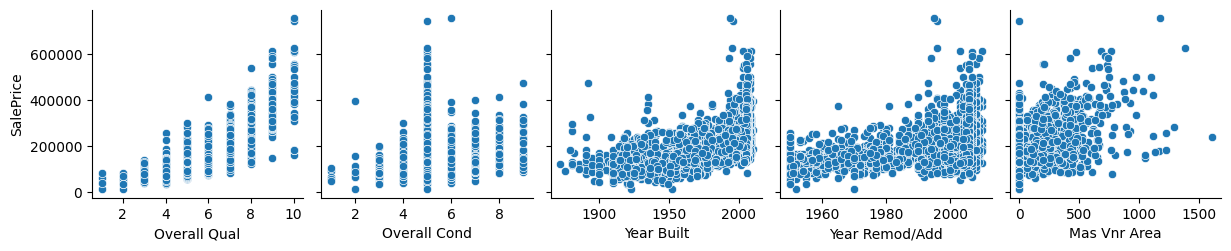

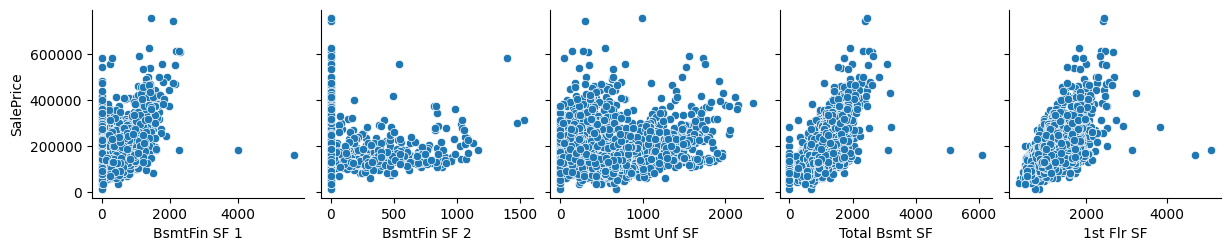

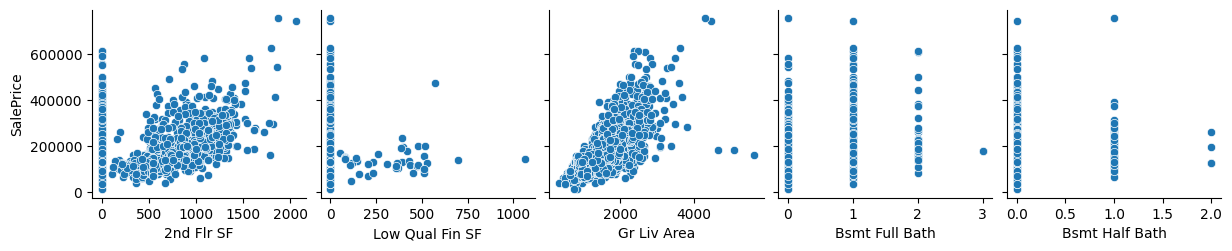

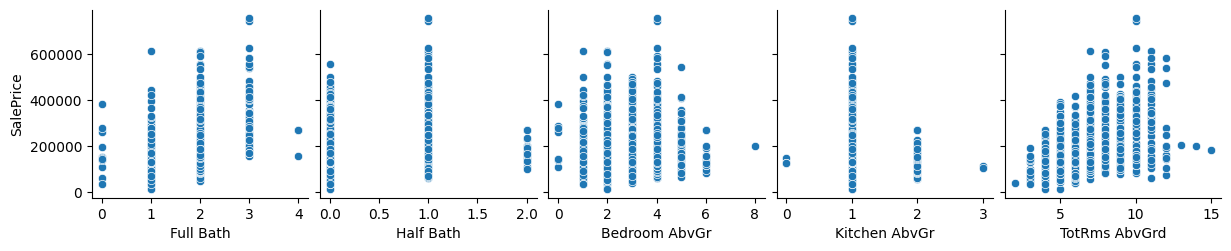

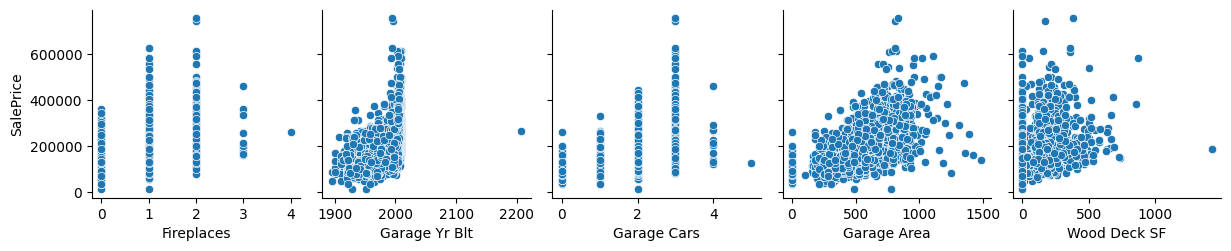

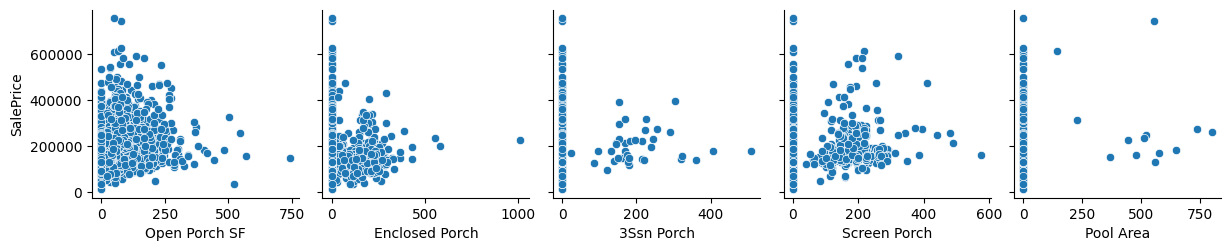

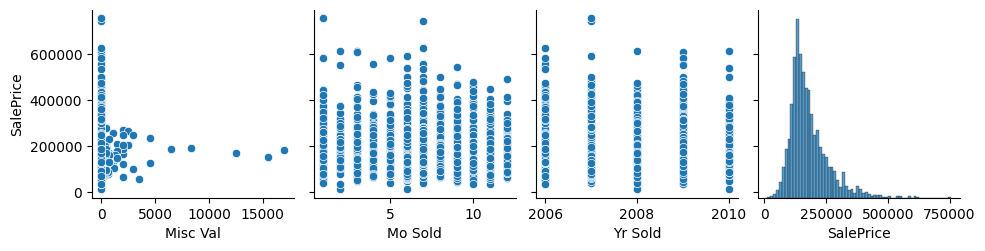

In [25]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['SalePrice'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.


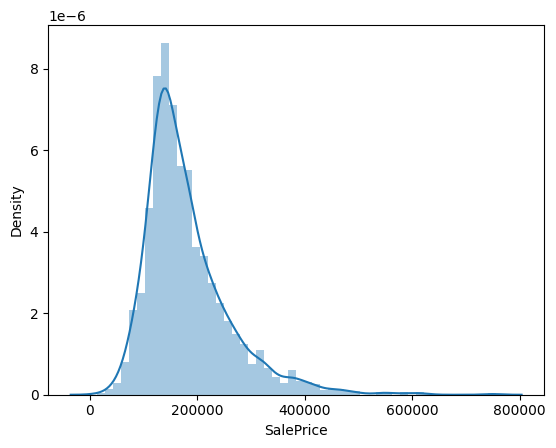

In [26]:
sp_untransformed = sns.distplot(housing['SalePrice'])

As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


Here, we can simply use the `skew()` function to calculate our skewness level of the `SalePrice`.


In [27]:
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.743222


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html) contains more information about the numpy log transform.


In [28]:
log_transformed = np.log(housing['SalePrice'])

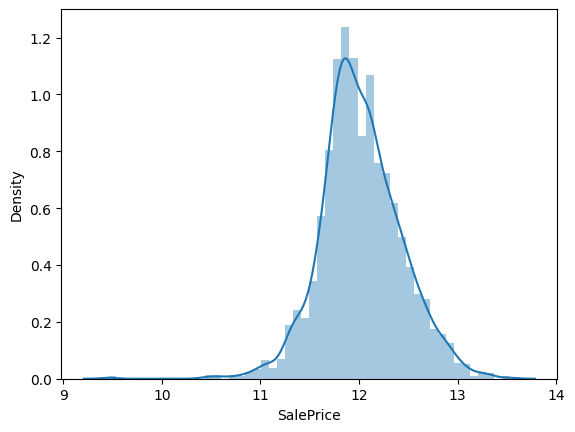

In [29]:
sp_transformed = sns.distplot(log_transformed)

In [30]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.015354


As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range. 

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45).


## Exercise 2


In this exercise, visually inspect the 'Lot Area' feature. If there is any skewness present, apply log transform to make it more normally distributed.


Skewness: 12.7780412f


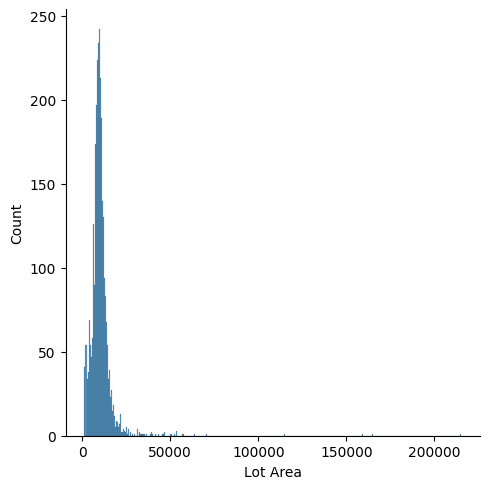

In [31]:
la_plot = sns.displot(housing['Lot Area'])
print('Skewness: %f2f' %housing['Lot Area'].skew())

In [32]:
la_log = np.log(housing['Lot Area'])
print("Skewness: %f" % la_log.skew())

Skewness: -0.494639


## **Handling the Duplicates**


As mentioned in the video, having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'PID' column, which contains a unique index number for each entry.


In [33]:
duplicate = housing[housing.duplicated(['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


As we can see, there is one duplicate row in this dataset. To remove it, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.


In [34]:
dup_removed = housing.drop_duplicates()
dup_removed 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


An alternative way to check if there are any duplicated Indexes in our dataset is using `index.is_unique` function.


In [35]:
housing.index.is_unique

True

## Exercise 3


In this exercise try to remove duplicates on a specific column by setting the subset equal to the column that contains the duplicate, such as 'Order'.


In [ ]:
romoved_sub= housing.drop_duplicates(subset=['Order'])

## **Handling the Missing Values**


### Finding the Missing Values


For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


Text(0.5, 1.0, 'Total Missing Values')

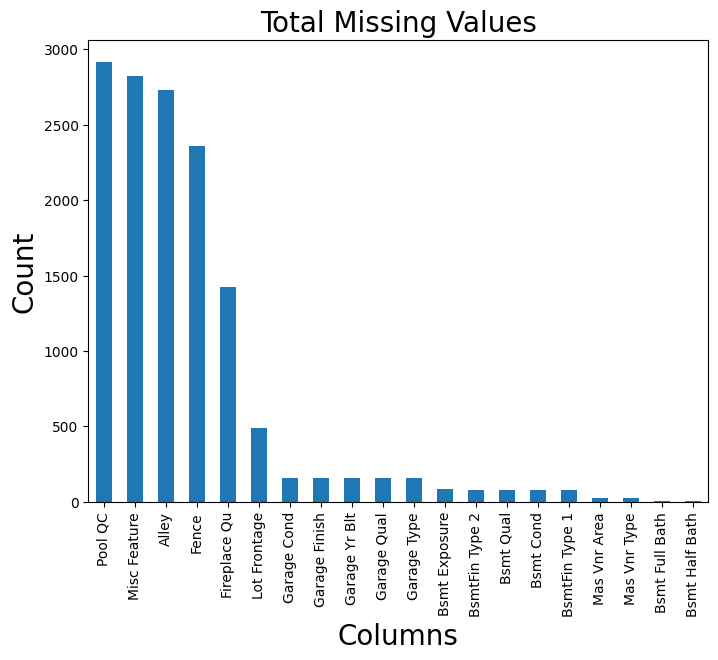

In [36]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.


1. We can drop the missing values, using `dropna()` method.


In [37]:
housing.dropna(subset=["Lot Frontage"])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Using this method, all the rows, containing null values in 'Lot Frontage' feature, for example, will be dropped. 


2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.


In [38]:
housing.drop("Lot Frontage", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Using this method, the entire column containing the null values will be dropped. 


3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


In [39]:
median = housing["Lot Frontage"].median()
median

68.0

In [40]:
housing["Lot Frontage"].fillna(median, inplace = True)

In [41]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


Index# 2927, containing a missing value in the "Lot Frontage", now has been replaced with the median value.


## Exercise 4


In this exercise, let's look at 'Mas Vnr Area' feature and replace the missing values with the mean value of that column.


In [42]:
mean=housing['Mas Vnr Area'].mean()
mean

101.9002751031637

In [43]:
housing['Mas Vnr Area'].fillna(mean, inplace=True)

In [44]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.



Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) please visit their respective documentation websites. 


First, we will normalize our data.


In [45]:
norm_data = MinMaxScaler().fit_transform(hous_num)
norm_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

Note the data is now a `ndarray` 


we can also standardize our data.


In [46]:
scaled_data = StandardScaler().fit_transform(hous_num)
scaled_data

array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]])

## Exercise 5


In this exercise, use `StandardScaler()` and `fit_transform()` functions to standardize the 'SalePrice' feature only.


In [47]:
scaled_sp = StandardScaler().fit_transform(housing['SalePrice'][:, np.newaxis])
scaled_sp

array([[ 0.4281423 ],
       [ 0.4281423 ],
       [-0.94923488],
       ...,
       [-0.61115139],
       [-0.13533019],
       [ 0.09005881]])

## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).


Here, we will use a box plot for the 'Lot Area' and the 'SalePrice' features. 


<Axes: xlabel='Lot Area'>

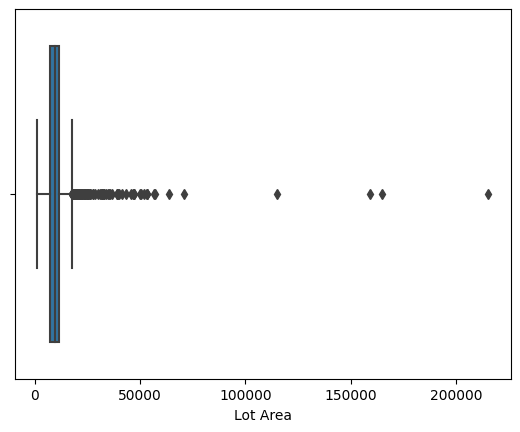

In [48]:
sns.boxplot(x=housing['Lot Area'])

<Axes: xlabel='SalePrice'>

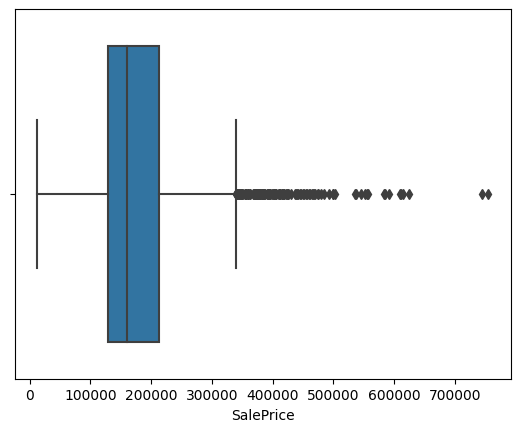

In [49]:
sns.boxplot(x=housing['SalePrice'])

As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'Lot Area' and the 'Sale Price' might be the actual true data points and do not need to be removed.


### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters. 


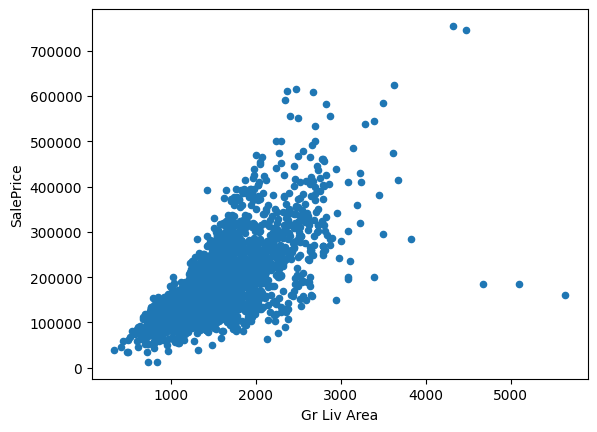

In [50]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

From the above graph, there are two values above 5000 sq. ft. living area that deviate from the rest of the population and do not seem to follow the trend. It can be speculated why this is happening but for the purpose of this lab we can delete them. 

The other two observations on the top are also deviating from the rest of the points but they also seem to be following the trend, so, perhaps, they can be kept.


### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [51]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


Now we will use the pandas `drop()` function to remove these two rows.


In [52]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

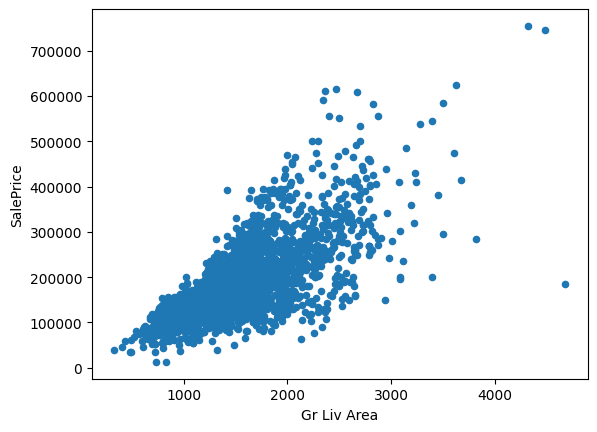

In [53]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

As you can see, we do not have the last two points of the 'Gr Liv Area' anymore.


### Deleting the Outliers: Statistics

In [ ]:
import numpy as np

#Calculate InterQuartile Range (IQR)
q25,q50,q75 = np.percentile(housing, [25,50,75])
iqr = q75 - q25

#calculate the min/max limits to be cosidered as an outlier
min= q25 - 1.5*(iqr)
max= q75 + 1.5*(iqr)

print (min, q25,q50,q75, max)

In [ ]:
# identify the points
[x for x in housing['SalePrice'] if x > max]

## Exercise 6


In this exercise, determine whether there are any outliers in the 'Lot Area' feature. You can either plot the box plot for the 'Lot Area', perform a bi-variate analysis by making a scatter plot between the 'SalePrice' and the 'Lot Area', or use the Z-score analysis. If there re any outliers, remove them from the dataset.


<Axes: xlabel='Lot Area'>

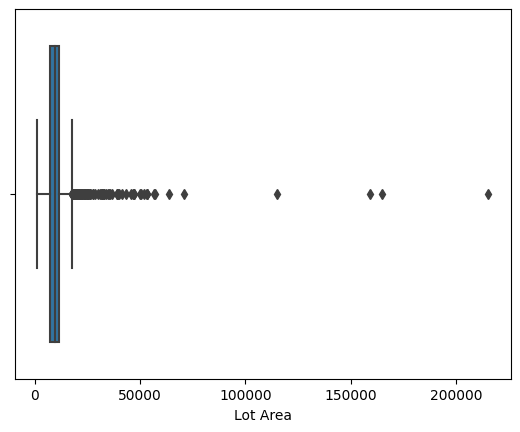

In [63]:
sns.boxplot(x=housing['Lot Area'])


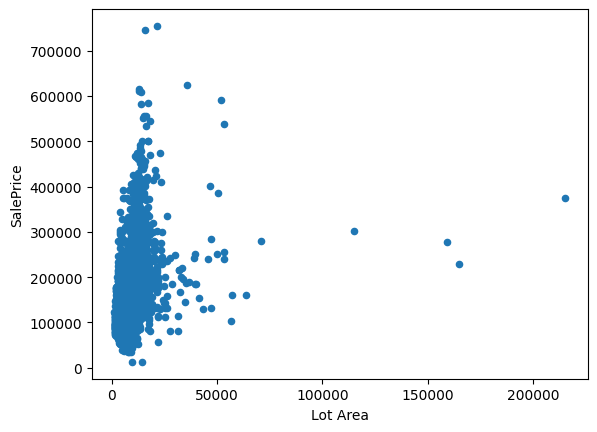

In [64]:
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')

In [65]:
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area']) 

#column contains the z-scores of the lot area values, indicating how many standard deviations 
 # each value is from the mean of the lot area.

In [66]:
housing[['Lot Area','Lot_Area_Stats']].describe().round(3)

,Lot Area,Lot_Area_Stats
count,2931.000,2931.000
mean,10155.299,0.000
std,7888.789,1.000
min,1300.000,-1.123
25%,7440.500,-0.344
50%,9439.000,-0.091
75%,11556.000,0.178
max,215245.000,26.002


In [73]:
housing.sort_values(by = 'Lot Area', ascending = False)[:1]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Lot_Area_Stats
1571,1571,916125425,190,RL,68.0,164660,Grvl,NaN,IR1,HLS,...,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,19.588693


In [71]:
lot_area_rem = housing.drop(housing.index[[957]], inplace=True)

In [72]:
housing.sort_values(by = 'Lot Area', ascending = False).head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Lot_Area_Stats
1571,1571,916125425,190,RL,68.0,164660,Grvl,NaN,IR1,HLS,...,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,19.588693
2116,2116,906426060,50,RL,68.0,159000,Pave,NaN,IR2,Low,...,NaN,NaN,Shed,500,6,2007,WD,Normal,277000,18.871096
2072,2072,905301050,20,RL,68.0,115149,Pave,NaN,IR2,Low,...,NaN,NaN,NaN,0,6,2007,WD,Normal,302000,13.311500
2767,2767,906475200,20,RL,62.0,70761,Pave,NaN,IR1,Low,...,NaN,NaN,NaN,0,12,2006,WD,Normal,280000,7.683821
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,6.812309


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
There seems to be one outlier, the very last point in the 'Lot Area' is too far from the rest of the group. Also, according to the Z-score, the standard deviation of that point exceeds the threshhold of 3.
</code>
</details>


## Z-score Analysis


Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score) site. 


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).


In [74]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2930.000,2930.000
mean,4.677,0.000
std,46.311,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.878


The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 22.882 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


# Congratulations! - You have completed the lab
